### Data visualization of Annamalai university FEAT First year students

<b>Importing the required modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from guess_indian_gender import IndianGenderPredictor
from tqdm.notebook import tqdm
tqdm.pandas()
import warnings
warnings.filterwarnings('ignore')

<b>Fetch the data from the annamalai university portal using read_html method</b>

In [2]:
import requests

url = 'https://annamalaiuniversity.ac.in/adm/coun_admlist_be.php?admfor=910955a907e739b81ec8855763108a29'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
r = requests.get(url,headers=header)
dfs = pd.read_html(r.text)
df=dfs[0]
df["rounds"]="Nan"
display(df.head())
df.to_csv("AUstd.csv")

,0,1,2,3,4,5,6,rounds
0,ONLINE ADMISSION -,NaN,NaN,NaN,NaN,NaN,NaN,Nan
1,SPL The last date for payment of Admission Fee...,NaN,NaN,NaN,NaN,NaN,NaN,Nan
2,Sl.No.,Appl.No.,Name,Branch,DOB,Community,Payment,Nan
3,1,201782,MOHAN K,Computer Science and Engineering (Artificial I...,17/08/2004,BC,NaN,Nan
4,Sl.No.,Appl.No.,Name,Branch,DOB,Community,Payment,Nan


<b>Creating the rounds column to specify the admission round of the student</b>

In [3]:
rounds=["SPL","Round - I","Round - I (Upward)","Round - II","Round - II (Upward)","Round - III","Round - III (Govt 7.5%)","SPL - DAB (Govt 7.5%)","Round - I (Govt 7.5%)","Round - II (Govt 7.5%)","Round - III (Upward) - Govt 7.5%","Round - III (Upward)","Additional","Round - IV","Round - IV (Govt 7.5%)","Round - IV (Upward)","Supplementary","Supplementary (Govt 7.5%)","SCA to SC"]
for i,j in zip(range(1,len(dfs)),rounds):
    dfs[i]["Rounds"]=j

<b>Clean the data </b>

In [4]:
final=[dfs[i] for i in range(1,len(dfs))]
#print(final)
final=pd.concat(final)
#display(final)
final=final[final[2]!="Name"]
final.columns=["SI.NO","Appl NO","Name","Branch","Dob","Community","Payment","Rounds"]
final.drop(["Payment"],axis=1,inplace=True)
final["SI.NO"]=[i for i in range(1,final.shape[0]+1)]
final.set_index("SI.NO",inplace=True)
display(final.head())

,Appl NO,Name,Branch,Dob,Community,Rounds
SI.NO,,,,,,
1,201782,MOHAN K,Computer Science and Engineering (Artificial I...,17/08/2004,BC,SPL
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I


<b>Find The total no of students

In [5]:
total_std=final.shape[0]
print(f"Total No of Students= {total_std}")

Total No of Students= 743


<b>Display the students details based on admission rounds using Bar diagram</b>

Total no of rounds of Admission is 19


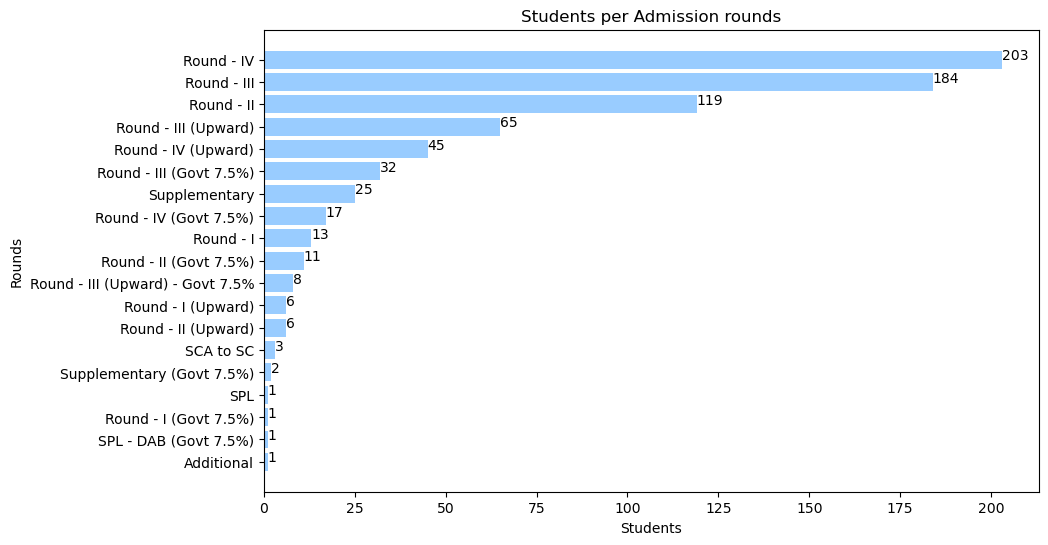

In [6]:
adm_rounds=final.Rounds.nunique()
print(f"Total no of rounds of Admission is {adm_rounds}")
count=final.groupby(["Rounds"]).size().reset_index(name="count")
count.sort_values("count",inplace=True)
plt.figure(figsize = (10,6))
x=count["Rounds"]
y=count["count"]
plt.barh(x,y,color="#99ccff")
plt.title("Students per Admission rounds")
plt.xlabel("Students")
plt.ylabel("Rounds")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>Display the students details based on admission rounds using pie diagram</b>

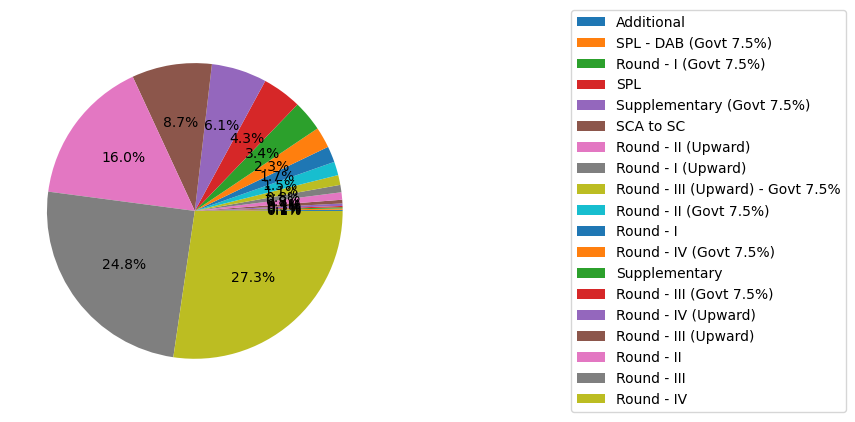

In [7]:
#display(count)
plt.pie(count["count"],autopct = '%1.1f%%')
plt.legend(labels=count["Rounds"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

<b>Highlight the duplicate Department names 

In [8]:
 pd.options.display.max_colwidth = 90
deps=pd.DataFrame(final.Branch.unique(),columns=["DEP"])
color = (deps["DEP"].str.contains("Artificial",case=False)).map({True: 'background-color: lightblue', False: ''})
deps.style.apply(lambda s: color)

,DEP
0,Computer Science and Engineering (Artificial Intelligence and Machine Learning)
1,COMPUTER SCIENCE AND ENGINEERING
2,COMPUTER SCIENCE AND ENGINEERING (ARTIFICIAL INTELLIGENCE AND MACHINE LEARNING)
3,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE)
4,ELECTRICAL AND ELECTRONICS ENGINEERING
5,ELECTRONICS AND COMMUNICATION ENGINEERING
6,INFORMATION TECHNOLOGY
7,MECHANICAL ENGINEERING
8,CIVIL ENGINEERING
9,CIVIL AND STRUCTUTURAL ENGINEERING


<b>Make the duplicate duplicate department names into one department

In [9]:
final["Branch"]=final["Branch"].str.upper()
final.loc[final["Branch"].str.contains("ARTIFICIAL"),"Branch"]="COMPUTER SCIENCE AND ENGINEERING (AI AND ML)"
display(pd.DataFrame(final.Branch.unique()))

,0
0,COMPUTER SCIENCE AND ENGINEERING (AI AND ML)
1,COMPUTER SCIENCE AND ENGINEERING
2,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE)
3,ELECTRICAL AND ELECTRONICS ENGINEERING
4,ELECTRONICS AND COMMUNICATION ENGINEERING
5,INFORMATION TECHNOLOGY
6,MECHANICAL ENGINEERING
7,CIVIL ENGINEERING
8,CIVIL AND STRUCTUTURAL ENGINEERING
9,CHEMICAL ENGINEERING


<b>Display the details of students based on their departments</b>

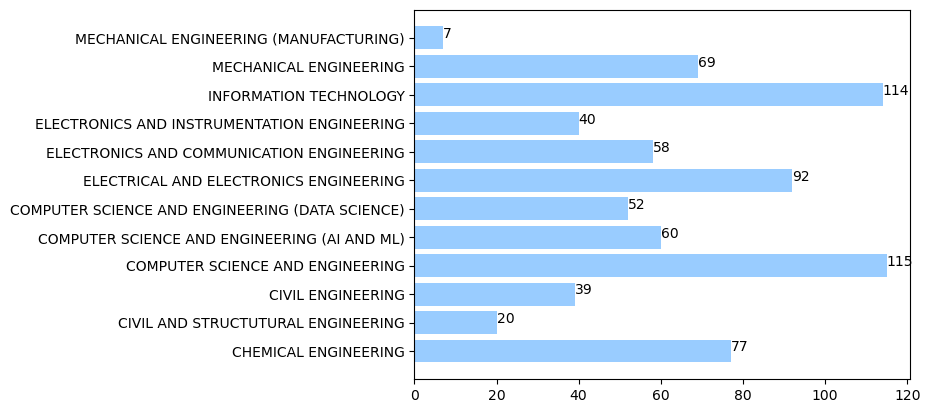

In [10]:
#student strength dep wise
df_dep=final.groupby(["Branch"]).size().reset_index(name="dep")
x=df_dep["Branch"]
y=df_dep["dep"]
plt.barh(x,y,color="#99ccff")
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

<b>display the details of students using pie diagram</b>

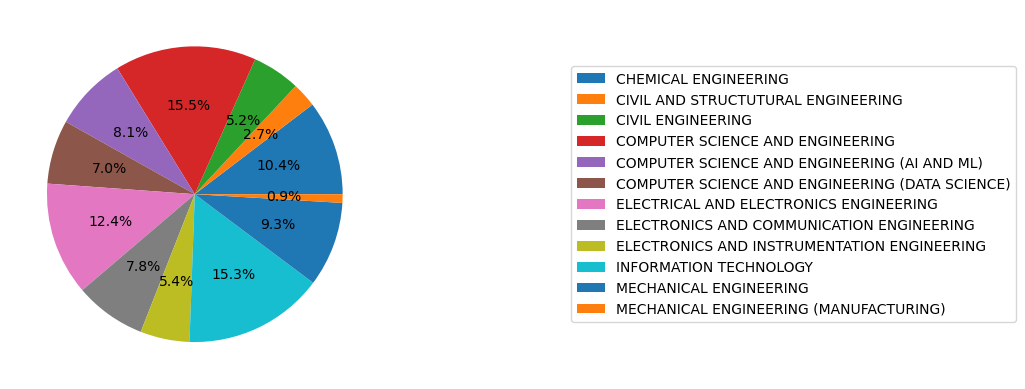

In [11]:
plt.pie(df_dep["dep"],autopct="%1.1f%%")
plt.legend(labels=df_dep["Branch"],loc="center left",bbox_to_anchor =(1.5, 0,0.5, 1))
plt.show()

In [12]:
def find_gender(names):
    names=names.replace("."," ")
    names=names.split()
    if len(names[0])<=2:
        names=names[1]
    else:
        names=names[0]
    i = IndianGenderPredictor()
    try:
        return i.predict(name=names) 
    except:
        return "NULL"
        

In [13]:
final_gender=final.head(10)
final_gender["gender"]=final_gender["Name"].progress_apply(find_gender)
display(final_gender)
#final.to_csv("genders.csv")
print("Creating the gender column using API")

  0%|          | 0/10 [00:00<?, ?it/s]

,Appl NO,Name,Branch,Dob,Community,Rounds,gender
SI.NO,,,,,,,
1,201782,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,male
5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
6,243318,EASTER RAJ A,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
7,263887,PRABAKARAN S,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),NaN,SC,Round - I,male
8,282973,K.Abinash,COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE),NaN,SC,Round - I,male
9,297262,PRAVINRAJ,ELECTRICAL AND ELECTRONICS ENGINEERING,NaN,SC,Round - I,male


Creating the gender column using API


<b>change the wrong values created by API

In [14]:
final=pd.read_excel("gender.xlsx")
final.head()

,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,1,201782,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,2,404123,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,3,337886,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,4,400218,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,5,318082,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


In [15]:
mech=final[final["Branch"]=="MECHANICAL ENGINEERING"]
mech["gender"]="male"
final.update(mech)

,gender,count
0,female,336
1,male,407


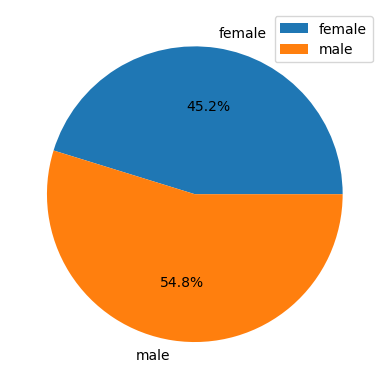

In [16]:
df_gender=final.groupby(["gender"]).size().reset_index(name="count")
display(df_gender)
plt.pie(df_gender["count"],labels=df_gender["gender"],autopct="%1.1f%%")
plt.legend(df_gender["gender"])
plt.show()

,SI.NO,Appl NO,Name,Branch,Dob,Community,Rounds,gender
0,1.0,201782.0,MOHAN K,COMPUTER SCIENCE AND ENGINEERING (AI AND ML),17/08/2004,BC,SPL,male
1,2.0,404123.0,DISHYA S,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female
2,3.0,337886.0,KALAI SELVAN M,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,male
3,4.0,400218.0,YOGESWARI MEYYAMMAI M,COMPUTER SCIENCE AND ENGINEERING,NaN,OC,Round - I,female
4,5.0,318082.0,Niranjana. T,COMPUTER SCIENCE AND ENGINEERING,NaN,BC,Round - I,female


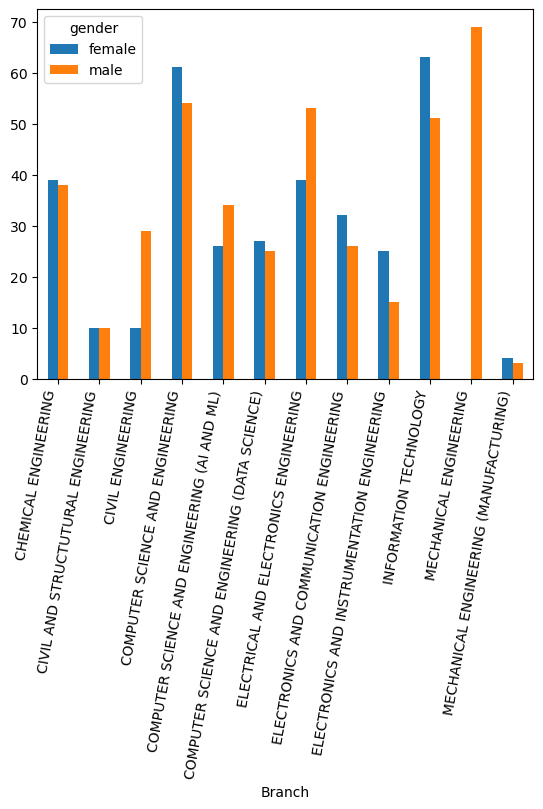

In [17]:
display(final.head())
final.groupby("gender").Branch.value_counts().unstack(0).plot.bar()
plt.xticks(rotation=80,ha="right")
plt.show()